# EDA

## Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import csv
#df = pd.read_csv("Merged.csv", encoding= 'unicode_escape')
df = pd.read_csv("Merged_UTF-8.csv", encoding='utf-8')

In [3]:
# confirm the data frame
df

,Title,URL,Description,Sex,Material,Price,Brand,Color,Unnamed: 8,Unnamed: 9
0,MEN Linen Blended Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,A single layer with a natural feel of natural ...,MEN,"68% Cotton, 32% Linen",29.9,UNIQLO,Color: COL69 NAVY,NaN,NaN
1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,Light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,UNIQLO,Color: COL37 BROWN,NaN,NaN
2,MEN Chino Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Updated to have a relaxed silhouette. Has a mo...,MEN,100% Cotton,29.9,UNIQLO,Color: COL09 BLACK,NaN,NaN
3,MEN Uniqlo U Wide Fit Easy Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Shorts inspired by military pants. Trendy loos...,MEN,100% Cotton,49.9,UNIQLO,Color: COL09 BLACK,NaN,NaN
4,MEN Chino Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Updated to have a relaxed silhouette. Has a mo...,MEN,100% Cotton,19.9,UNIQLO,Color: COL08 DARK GRAY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51549,Esmee Exclusive relaxed beach jumpsuit in white,https://images.asos-media.com/products/esmee-e...,After some new beachwear for your next trip? E...,WOMEN,NaN,28.0,ASOS,White,NaN,NaN
51550,Selected Femme culotte jumpsuit in black,https://images.asos-media.com/products/selecte...,"Embracing freedom, identity and style, Selecte...",WOMEN,NaN,45.9,ASOS,Black,NaN,NaN
51551,Selected Femme printed playsuit,https://images.asos-media.com/products/selecte...,"Embracing freedom, identity and style, Selecte...",WOMEN,NaN,22.5,ASOS,Multi,NaN,NaN
51552,Selected Femme utility playsuit with tie waist...,https://images.asos-media.com/products/selecte...,"Embracing freedom, identity and style, Selecte...",WOMEN,NaN,28.5,ASOS,Sand,NaN,NaN


In [4]:
# confirm null data
df.isnull().sum()

Title              0
URL               29
Description      198
Sex                0
Material       32462
Price          14702
Brand              0
Color          15513
Unnamed: 8     51554
Unnamed: 9     51362
dtype: int64

In [5]:
# drop data which URL or Descryption is null
df = df.dropna(subset=['URL', 'Description'])

In [6]:
# delete space more than 2
df['Description_processed'] = -1
for i in range(len(df)):
    df.iloc[i,-1] = " ".join(df.iloc[i,2].split())

C:\Users\gamis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gamis\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [7]:
# add the column of the length of the descryption
df['Length_of_description'] = -1
for i in range(len(df)):
    df.iloc[i,-1] = len(df.iloc[i,-2].split())

C:\Users\gamis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# make df for price analysis
df_del_noprice_data = df.copy()
df_del_noprice_data = df_del_noprice_data.dropna(subset=['Price'])

In [9]:
# confirm the data
df.head()

,Title,URL,Description,Sex,Material,Price,Brand,Color,Unnamed: 8,Unnamed: 9,Description_processed,Length_of_description
0,MEN Linen Blended Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,A single layer with a natural feel of natural ...,MEN,"68% Cotton, 32% Linen",29.9,UNIQLO,Color: COL69 NAVY,NaN,NaN,A single layer with a natural feel of natural ...,56
1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,Light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,UNIQLO,Color: COL37 BROWN,NaN,NaN,Light and cool shorts are perfect for relaxing...,31
2,MEN Chino Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Updated to have a relaxed silhouette. Has a mo...,MEN,100% Cotton,29.9,UNIQLO,Color: COL09 BLACK,NaN,NaN,Updated to have a relaxed silhouette. Has a mo...,55
3,MEN Uniqlo U Wide Fit Easy Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Shorts inspired by military pants. Trendy loos...,MEN,100% Cotton,49.9,UNIQLO,Color: COL09 BLACK,NaN,NaN,Shorts inspired by military pants. Trendy loos...,83
4,MEN Chino Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,Updated to have a relaxed silhouette. Has a mo...,MEN,100% Cotton,19.9,UNIQLO,Color: COL08 DARK GRAY,NaN,NaN,Updated to have a relaxed silhouette. Has a mo...,55


## Visualize the statistics of the data

In [10]:
# statistics of sex
label_sex = list(set(list(df["Sex"].values)))
height_sex = []
for i in range(len(label_sex)):
    height_sex.append(list(df["Sex"].values).count(label_sex[i]))

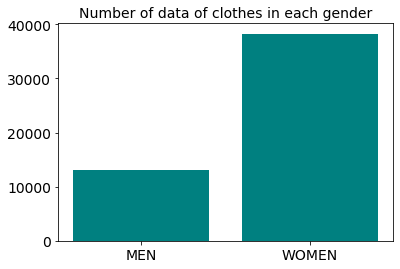

In [11]:
# plot
plt.bar(label_sex, height_sex, color='teal')
plt.title("Number of data of clothes in each gender", fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(labelsize=14);

In [12]:
# statistics of brand
label_brand = list(set(list(df["Brand"].values)))
height_brand = []
for i in range(len(label_brand)):
    height_brand.append(list(df["Brand"].values).count(label_brand[i]))

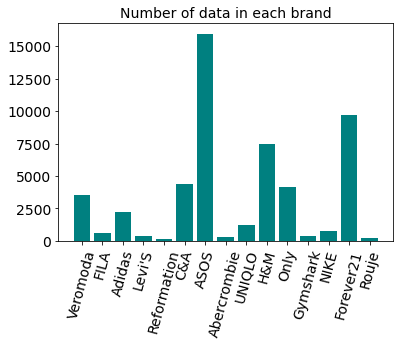

In [13]:
# Plot
plt.bar(label_brand, height_brand, color='teal')
plt.xticks(rotation=75, fontsize=14)
plt.title("Number of data in each brand", fontsize=14)
plt.tick_params(labelsize=14);

In [14]:
# statistics of the average length of the explanationv corresponding to sex
height_sex_avedisc = []
for i in range(len(label_sex)):
    height_sex_avedisc.append(df[df.Sex == label_sex[i] ].Length_of_description.mean())

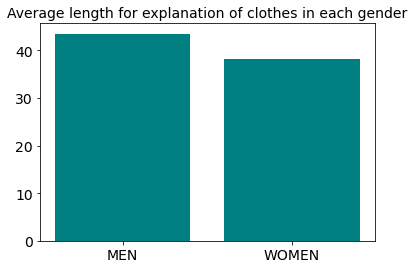

In [15]:
# Plot
plt.bar(label_sex, height_sex_avedisc, color='teal')
plt.title("Average length for explanation of clothes in each gender", fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(labelsize=14);

In [16]:
# statistics of the average length of the explanationv corresponding to brands
height_brand_avedisc = []
for i in range(len(label_brand)):
    height_brand_avedisc.append(df[df.Brand == label_brand[i] ].Length_of_description.mean())

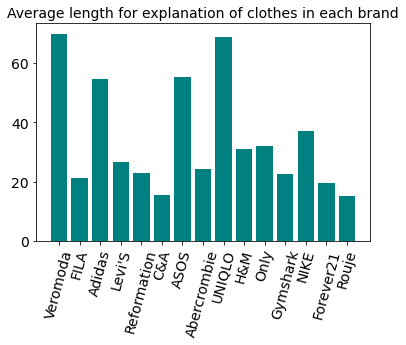

In [17]:
plt.bar(label_brand, height_brand_avedisc, color='teal')
plt.xticks(rotation=75, fontsize=14)
plt.title("Average length for explanation of clothes in each brand", fontsize=14)
plt.tick_params(labelsize=14);

In [18]:
# statistics of the average length of the explanationv corresponding to brands
label_brand_price = list(set(list(df_del_noprice_data["Brand"].values)))
height_aveprice = []
for i in range(len(label_brand_price)):
    height_aveprice.append(df_del_noprice_data[df_del_noprice_data.Brand == label_brand_price[i]].Price.mean())

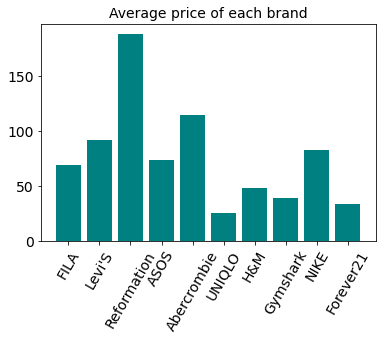

In [19]:
plt.bar(label_brand_price, height_aveprice, color='teal')
plt.xticks(rotation=60, fontsize=14)
plt.title("Average price of each brand", fontsize=14)
plt.tick_params(labelsize=14);

## Correlation

In [20]:
# Correlation between the length of explanation and price
height_brand_avedisc_col = []
for i in range(len(label_brand_price)):
    height_brand_avedisc_col.append(df_del_noprice_data[df_del_noprice_data.Brand == label_brand_price[i] ].Length_of_description.mean())

print("Correlation between the average price and the avelage length of explanation of each brand")
np.corrcoef(height_aveprice, height_brand_avedisc_col)

Correlation between the average price and the avelage length of explanation of each brand


array([[ 1.        , -0.31944365],
       [-0.31944365,  1.        ]])

It can be seen that there is a week negative correlation between the price and length of the explanation of clothes. We can regard this results as high-blands tend to explain less. Actually, people tend to know the high blands quality is superior to others without explanation. Also, high-blands often put effort on get their homepage to be stilish. It may cause the result of weak correlation.

## Word cloud

In [21]:
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
    ## This is a top word in the word crowd, but it makes garbace characters so that I replace it.
    ## We need to discuss whether other characters should be replaced manually or simply delete.
    comment_words = comment_words.replace("you窶况e", "you're")
    ##

wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

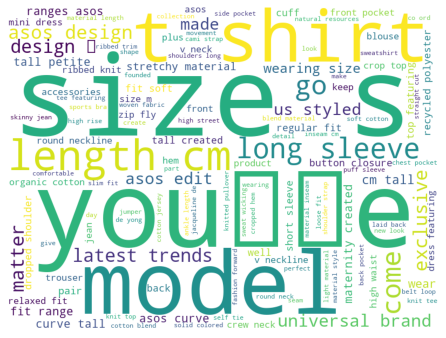

In [22]:
# plot the WordCloud image                        
plt.figure(figsize = (6, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Word counter

In [23]:
from collections import Counter
counter = Counter(comment_words)
print(counter)

Counter({' ': 2027138, 'e': 1067830, 't': 854180, 'a': 763095, 's': 749489, 'o': 686341, 'i': 665401, 'n': 622125, 'r': 608629, 'l': 444377, 'd': 392463, 'h': 356323, 'c': 324731, 'u': 277268, 'f': 218217, 'g': 196778, 'm': 187569, 'p': 184815, 'w': 173024, 'y': 169715, 'b': 144529, ',': 135880, '.': 130523, 'k': 116489, '-': 115600, 'v': 92657, 'j': 31841, '窶': 30249, 'z': 26371, 'x': 21557, ':': 12278, '决': 11897, '1': 9367, '・': 8863, '7': 8824, '0': 7646, "'": 6893, '冱': 6659, 'q': 6090, '5': 5840, '6': 5701, '3': 5540, '4': 4689, '9': 4644, '8': 4436, '2': 4310, '?': 3771, '/': 2366, '"': 2077, '&': 1188, '冲': 1002, '邃': 966, '｢': 966, '(': 801, ')': 801, '况': 741, '%': 709, '’': 488, '冤': 387, 'ﾃ': 369, '亘': 299, 'ｩ': 225, ';': 209, '#': 177, 'ﾂ': 174, '惑': 148, '“': 125, '”': 125, '\uf8f0': 121, '!': 115, '和': 77, 'ｸ': 66, 'ｮ': 53, '[': 52, '蕨': 52, ']': 43, 'ｦ': 38, '+': 34, '×': 29, '竅': 25, '<': 24, 'ｪ': 23, '_': 17, '囘': 15, '>': 14, '杯': 13, '冢': 13, '$': 11, '僖': 10, '‘': 